<a href="https://colab.research.google.com/github/renezanelli/data_science/blob/master/Project_Airbnb_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb Data Analysis in Rio de Janeiro

Founded in 2008 with some students offering an air mattress, bed and breakfast in their apartment, [Airbnb](https://www.airbnb.com/) is now one of the world's largest marketplace for places to stay, offering over 7 million accommodations in more than 200 countries and regions, and they don’t even have a single hotel room!

Connecting people who want to discover new places and experiences with local hosts, Airbnb offers a practical and affordable solution, with financial leverage for both parties and, most importantly, promoting people-to-people community and trust around the world.

In 2012, the first Airbnb rooms emerged in Brazil, but the boom came when Brazil hosted the FIFA World Cup in 2014 having [120 thousand Airbnb guests](http://mundodasmarcas.blogspot.com/2014/11/airbnb.html#:~:text=No%20m%C3%AAs%20de%20junho%20de,airbnb%20acomodou%20120%20mil%20visitantes). After the 2016 Olimpic Games, the most famous city in Brazil, known worldwide for its famous beaches, soccer, samba, and a vibrating nightlife, became an even more attractive tourist destination and Airbnb accommodations followed that trend.

This project analyzes the [dataset](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv) provided by [Inside the Airbnb](http://insideairbnb.com/get-the-data.html) regarding Airbnb accommodations in the city of Rio de Janeiro and tries to transform the raw data into useful information and insights that lead to conclusions about the most expensive neighbourhoods.


<center><img alt="Analisando Airbnb" width="80%" src="https://img.ibxk.com.br/2017/06/12/12190700114500.jpg?w=1120&h=420&mode=crop&scale=both"></center>

# Data Aquisition

Airbnb has the policy of providing a huge amount of data of the most visited cities in the world. The dataset used in this project is the Rio de Janeiro's `listings.csv`, updated on 20 April 2020.

The raw data can be accessed by clicking [here](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv). 

In [2]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set_style('darkgrid');

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')

# Data Analysis

The loaded data is in Pandas Data Frame format, a first look at the five top lines can show how the information is arranged.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


In [5]:
# checking the size of the DataFrame
print("Rows:\t {}".format(df.shape[0], left_aligned=True))
print("Columns: {}\n".format(df.shape[1], left_aligned=True))

# checking the type of the variables
display(df.dtypes)

Rows:	 35870
Columns: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Checking for *Null* Values in the Data

*Null* values can compromise the analysis, so they must be identified and deleted (or replaced).


In [6]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0])

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Since the percentage of *null* values in the columns `neighbourhood_group`, `reviews_per_month` and `last_review` is considerably high (over 40%), those columns shall be deleted.

In [7]:
df.drop(['neighbourhood_group', 'reviews_per_month', 'last_review'], axis=1, inplace=True)

## Data Distribution Analysis

Analyzing data distribution is possible to verify the range of values and check if some of them are outliers. To perform this analysis, histogram plots and statistical information are assessed.

### Histograms

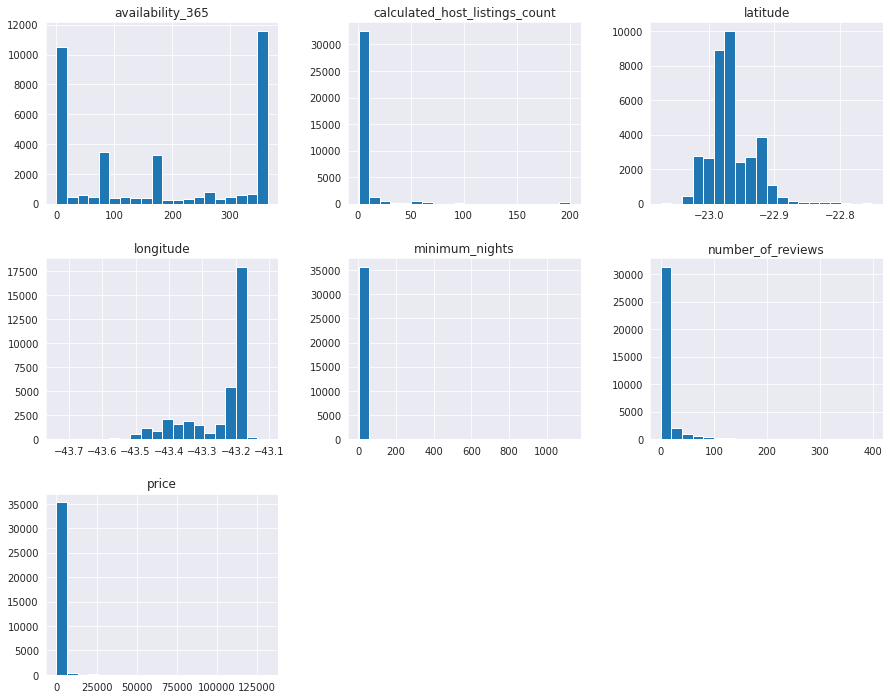

In [8]:
df.drop(['id', 'host_id'], axis=1).hist(figsize=(15, 12), bins=20);

It is possible to verify that there might be some outliers in the columns `calculated_host_listings_count`, `minimum_nights` and `price`. Those values appear to be distorting the distribution of these columns. 

To detect the actual outliers there are two simple tools that can be used:
* Statitical resume with method `.describe()`
* Use of `boxplots`


In [9]:
df.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1).describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,6.613995,180.371815
std,2229.366334,22.471085,25.827647,22.769663,152.510778
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,200.000000,365.000000


From the statistical resume, it can be assessed that:
* The column `price` presents 75% os its values bellow 632, but its maximum value is over 200 times bigger
* The maximum value in the column `minimum_nights` exceeds the number of days in a year

Those observations also indicate the existence of outliers. Some `boxplots` are used to better illustrate them.

### Boxplot `minimum_nights`

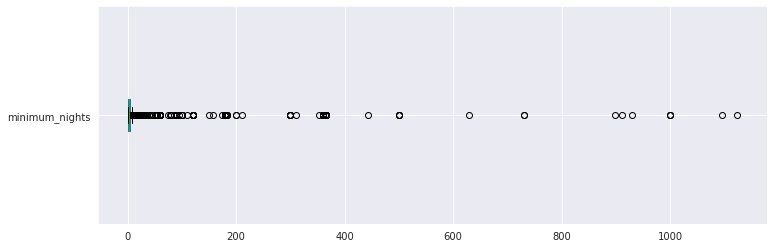

Values above 30 respond to 0.6245%


In [10]:
df['minimum_nights'].plot(kind='box', vert=False, figsize=(12,4));
plt.show()
print('Values above 30 respond to {:.4f}%'.format(((df[df['minimum_nights']>30].shape[0])/df.shape[0])*100))

### Boxplot `price`

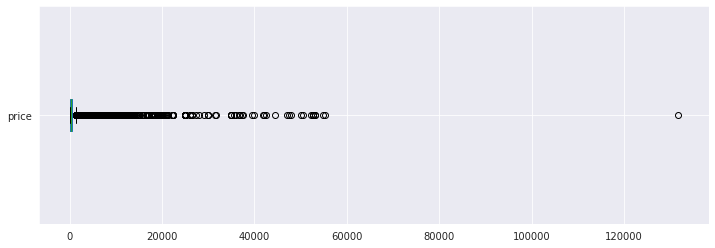

Values above 1500 respond to 9.3672%


In [11]:
df['price'].plot(kind='box', vert=False, figsize=(12,4));
plt.show()
print('Values above 1500 respond to {:.4f}%'.format(((df[df['price']>1500].shape[0])/df.shape[0])*100))

As presented in the `boxplots`, the values of `price` above 1500 and of `minimum_nights` above 30 are a minority that was distorting the distribution of data. Most of them are probably a consequence of some error in data acquisition.

Those values are, therefore, deleted from the dataset and new histograms are presented with better distribution.

### Clean Data

A new Data Frame is generated without the outliers identified above.

In [12]:
df_new = df[(df['price']<=1500) & (df['minimum_nights']<=30)]

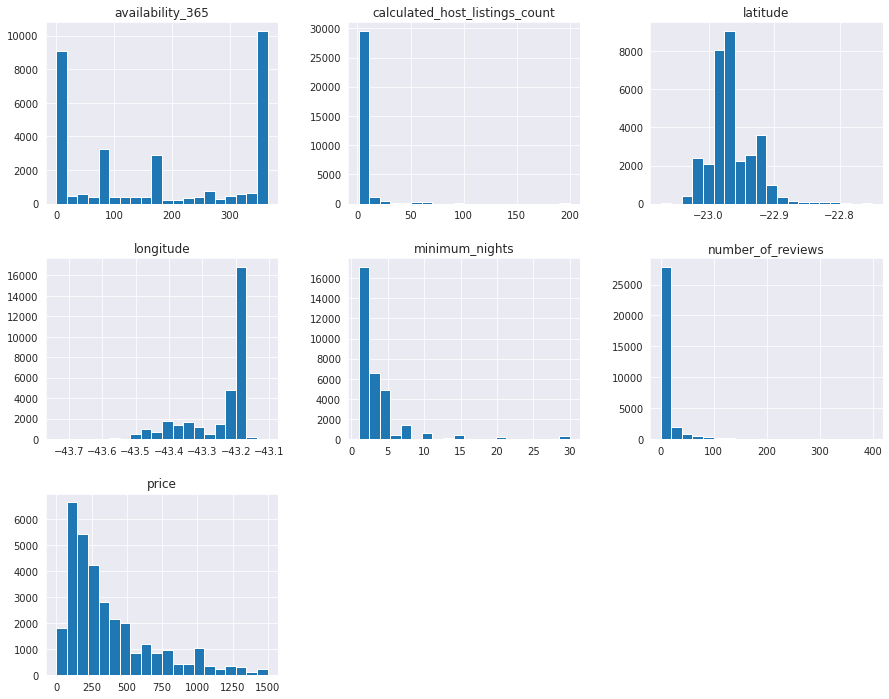

In [13]:
df_new.drop(['id', 'host_id'], axis=1).hist(figsize=(15, 12), bins=20);

### Most Expensive Neighbourhoods 

In [14]:
df_new.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

For those who are familiar with the city of Rio de Janeiro or have done some research about [the most expensive neighbourhoods in Rio](https://www.temsustentavel.com.br/rankings-dos-m%C2%B2-mais-caros-rio-de-janeiro-e-sao-paulo/), it can be observed that the higher Airbnb prices don't illustrate properly the reality of prices in the city. A possible reason for this unexpected result might be the amount of available Airbnb accommodations and the kind of property they are.

These results are presented below, with some statistical information that can help the observation.

In [15]:
temp = df_new.groupby(['neighbourhood'])['price'].agg(['min', 'mean', 'max', 'std', 'count']).sort_values(by='mean', ascending=False)[:10]

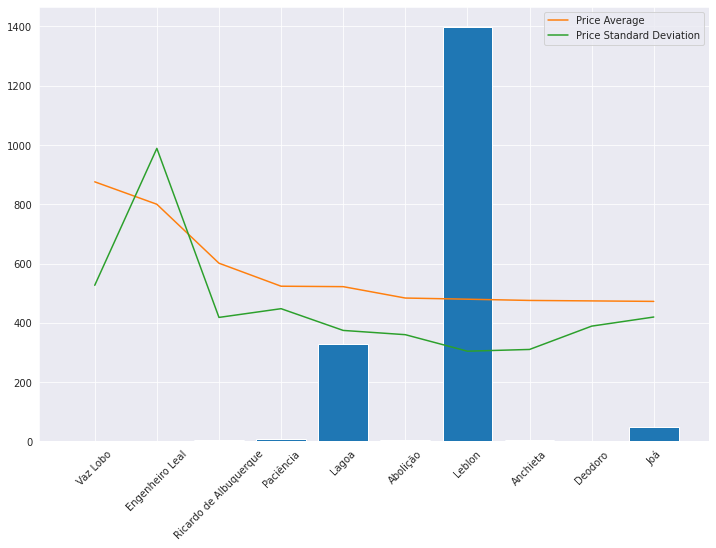

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x=list(temp.index), height=temp['count'], color='C0');
ax.plot(list(temp.index),temp['mean'], color='C1');
ax.plot(list(temp.index), temp['std'], color='C2');
ax.legend(['Price Average', 'Price Standard Deviation']);
plt.xticks(rotation=45);

The amount of accommodations seems to be relevant to represent the mean prices for each neighbourhood, as the most "*non-real*" values have a lack of sample space and have shown large standard deviation compared to regions with a larger number of accommodations, it can be considered the reason of these unexpected results.

In order to acquire a sample space that can statistically represent the reality of Airbnb rooms in Rio, disregarding neighbourhoods with less than 20 available rooms can be a feasible approach.

In [17]:
temp1 = df_new['neighbourhood'].value_counts()
df_small = df_new.set_index('neighbourhood', drop=True)
for i in range(len(temp1)):
  if temp1[i]<=20:
    df_small.drop(temp1.index[i], inplace=True)

In [18]:
temp2 = df_small.groupby(['neighbourhood'])['price'].agg(['min', 'mean', 'max', 'std', 'count']).sort_values(by='mean', ascending=False)[:10]

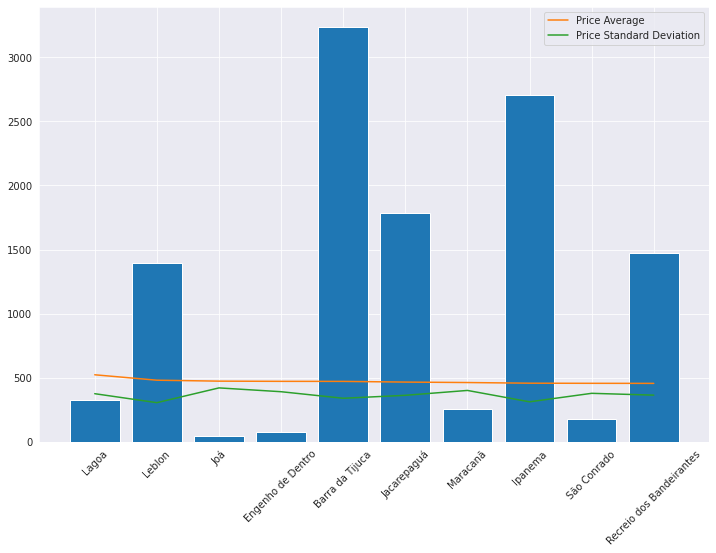

In [19]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.bar(x=list(temp2.index), height=temp2['count'], color='C0')
ax1.plot(list(temp2.index), temp2['mean'], color='C1')
ax1.plot(list(temp2.index), temp2['std'], color='C2')
ax1.legend(['Price Average', 'Price Standard Deviation']);
plt.xticks(rotation=45);

 Reducing the data frame to neighbourhoods with an expressive amount of data, the list of the most expensive ones now fits better the city’s reality.


### Neighbourhoods with the Highest Number of Airbnb Rooms

The average price of an Airbnb room in a neighbourhood is an important variable when planning the booking, however, the availability of rooms in the area should also be checked. A good way to assess that is by evaluating the neighbourhoods that have the most Airbnb rooms and the highest availability during the year.

In [108]:
teste = df_new.groupby(['neighbourhood'])['availability_365'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
teste[:5]

,count,mean
neighbourhood,,
Copacabana,8842,187.661050
Barra da Tijuca,3233,187.749768
Ipanema,2707,181.365719
Jacarepaguá,1783,182.941671
Botafogo,1675,154.148657


In [118]:
top5 = teste['count'][:5].sum()/teste['count'].sum()*100
last150 = teste['count'][5:].sum()/teste['count'].sum()*100

The 5 nighbourhoods with highest number of Airbnb added represent 56.45% of the accommodations in all 
the 155 neighbourhoods listed.

The neighbourhoods that have the highest number of Airbnb rooms also have an availability of 50% of the time during the year. Therefore, they should be the easiest ones to find a place.

### Geographical Distribution

The plot bellow can better illustrate the geographical arrangement of the Airbnb accommodations in Rio de Janeiro as a function of price. 

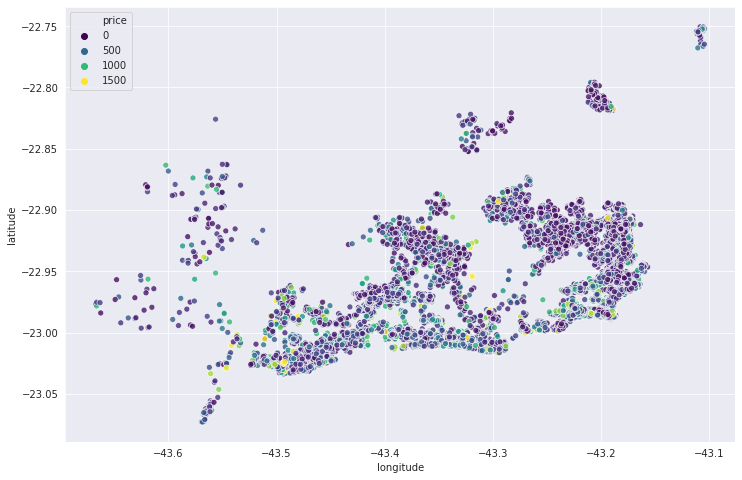

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', data=df_small, hue='price', palette='viridis', alpha=0.8);
plt.legend()

# Conclusions

It is worth mentioning that, this report was built based on a dataset with limited information, more complex conclusions would require a complete dataset, which can also be found at Inside Airbnb.

However, some interesting conclusions can be assessed by exploring this resumed data:
* Leblon, Ipanema and Lagoa are on the top 10 most expensive neighbourhood to rent an Airbnb accommodation
* The 5 neighbourhoods with the highest number of Airbnb rooms (Copacabana, Barra da Tijuca, Ipanema, Jacarepaguá e Botafogo) have, together, more rooms than the other 150 ones added.
* The map shows that the great majority of the Airbnb rooms are located in the wealthiest part of the city
